# Unsupervised Clustering 

In [79]:
%reload_ext autoreload
%autoreload 2
from clustering_details import *

### Data: Retail store transactions

In [80]:

load_input_data_from_file("./RetailData.csv")

dataset size: [ 1238 rows, 14 columns]


,Order Id,Order Date,Month,Customer,Invoice Id,Product Id,Product Name,Qty,Rate,Net Amount,Tax Type,TAX,Tax Amount,Amount
0,10067,42406,Feb,Customer 1,10075,10023,RICE STICKS 5MM 1PKT,30.0,159.5,4785.0,VAT,14.5,693.83,4785.0
1,10177,42443,Mar,Customer 1,10145,ITEM-CM_BLACKPEPPER,BLACK PEPPER QUALITY2 1KG,1.0,810.0,810.0,VAT,5.5,44.55,810.0
2,10177,42443,Mar,Customer 1,10145,10466,BASMATI RICE QUALITY1 25KG,1.0,2050.0,2050.0,,0.0,0.00,2050.0
3,10052,42401,Feb,Customer 1,10060,10534,WALNUT QUALITY2 1KG,1.0,1317.0,1317.0,VAT,14.5,190.97,1317.0
4,10052,42401,Feb,Customer 1,10060,ITEM-BADAM,ALMOND 1KG,2.0,922.0,1844.0,VAT,14.5,267.38,1844.0


### Columns 'Qty' and 'Rate' are used for clustering

In [81]:
clustering_cols_data=set_cols_used_for_clustering(['Qty', 'Rate'])

[ 1238  rows]


### Divide data into clusters and visualize

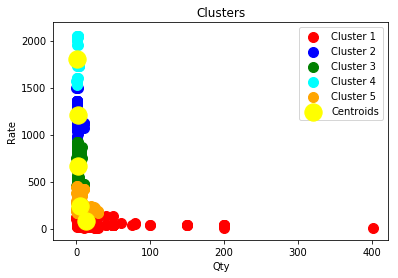

In [82]:
deduce_clusters(num_clusters=5)


In [83]:
print_inertia_metric()

Inertia is: 7.72e+06


## Use elbow method to get optimum number of clusters

#Clusters: 1 -> Inertia: 1.97e+08
#Clusters: 2 -> Inertia: 4.53e+07
#Clusters: 3 -> Inertia: 2.09e+07
#Clusters: 4 -> Inertia: 1.34e+07
#Clusters: 5 -> Inertia: 7.73e+06
#Clusters: 6 -> Inertia: 5.08e+06


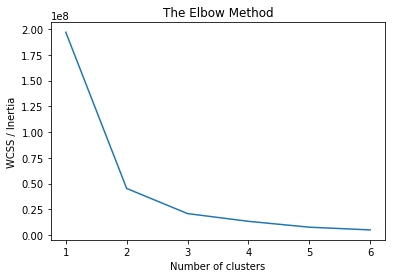

In [84]:
# Compute inertia for various numbers of clusters (1 to 6) 
compute_and_plot_elbow (max_clusters=6)

In [85]:
print("Best k here based on elbow curve for inertia is", 3)

Best k here based on elbow curve for inertia is 3
